![Python Programming for Scientists in a hurry](./fig/Title_Python.png)

<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 60%; padding: 5px">
  <h1 id="subtitle">Chapter 2. Standard Library</h1>
  <h2 id="subtitle">Guillermo Avendaño Franco<br>Aldo Humberto Romero</h2>
  <br>
  <img src="fig/1-line logotype124-295.png" alt="Scientific Computing with Python" style="width:50%" align="left">
  </div>
  <div style="border: none; float: left; width: 30%; padding: 5px">
  <img src="fig/SCPython.png" alt="Scientific Computing with Python" style="width:100%">
  </div>
</div>

## List of Notebooks

Python is a great general-purpose programming language on its own.
Python is a general purpose programming language. It is interpreted and dynamically typed and is very suited for interactive work and quick prototyping while being powerful enough to write large applications in.
The lesson is particularly oriented to Scientific Computing. 
Other episodes in the series include:

  * Language Syntax
  * **Standard Library \[This notebook\]**
  * Scientific Packages
  * Numpy
  * Matplotlib
  * SciPy 
  * Pandas
  * Cython
  * Parallel Computing

After completing all the series in this lesson you will realize that python has become a powerful environment for scientific computing at several levels, from interactive computing to scripting to big project developments.

## Setup

In [1]:
%load_ext watermark

In [2]:
%watermark

Last updated: 2024-07-25T17:32:17.639791-04:00

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.14.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.29)
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [3]:
import time
start = time.time()
chapter_number = 2
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%watermark -iv

matplotlib: 3.8.2
numpy     : 1.26.2



# Python Standard Library

# Table of Contents

 1. [Introduction](#introduction)
 1. [Module `sys`](#sys)
 1. [Modules `math` and `cmath`](#math)
 1. [Modules `os` and `os.path`](#os)
 1. [Module `shutil`](#shutil)
 1. [Module `itertools`](#itertools)
 1. [Module `json`](#json)
 1. [Module `subprocess`](#subprocess)
 1. [module `multiprocessing`](#multiprocessing)

<a id="introduction"></a>
# Introduction

The Python Standard Library (PSL) is a set of modules distributed with Python and they are included in most Python implementations. With some very specific exceptions, you can take for granted that every machine capable of running Python code will have those modules available too. 

The Python’s standard library is very extensive. The library contains built-in modules (written in C) that provide access to system functionality such as file I/O that would otherwise be inaccessible to Python programmers, as well as modules written in Python that provide standardized solutions for many problems that occur in everyday programming. The idea we are trying to use here is that the existence of some modules will help with the simplicity of the program and they will allow also portability between different systems. Python is trying to create a natural neutral platform for application programming interfaces (APIs). 

Here we are making a selection of a few modules that are commonly used in Scientific Computing. The selection itself is rather subjective but from experience, most users using Python for research, especially numerical-oriented calculations will use at some point several of these modules. 

The complete documentation about these modules can be found [here](https://docs.python.org/3/library/index.html)

<a id="sys"></a>
# Module `sys`

This module provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. It is always available. More info can be found in [sys](https://docs.python.org/3/library/sys.html) 

In [6]:
import sys

There are a few reasons to include this module in the selection, consider getting the version of Python that is in use:

In [7]:
sys.version

'3.11.7 (main, Dec 24 2023, 07:47:18) [Clang 12.0.0 (clang-1200.0.32.29)]'

In [8]:
sys.version_info

sys.version_info(major=3, minor=11, micro=7, releaselevel='final', serial=0)

To know information about the limits of float type. `sys.float_info` contains low-level information about the precision and internal representation. The values correspond to the various floating-point constants defined in the standard header file float.h for the ‘C’ programming language; see section 5.2.4.2.2 of the 1999 ISO/IEC C standard [C99], ‘Characteristics of floating types’, for details.

In [9]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

Each value can be retrieved independently like

In [10]:
sys.float_info.max

1.7976931348623157e+308

Similarly for integers:

In [11]:
sys.int_info

sys.int_info(bits_per_digit=30, sizeof_digit=4, default_max_str_digits=4300, str_digits_check_threshold=640)

To get the size of any object in bytes:

In [12]:
a=list(range(1000))
sys.getsizeof(a)

8056

In [13]:
b=range(1000)
sys.getsizeof(b)

48

By itself, the builtin function `sys.getsizeof()` does not help determine the size of a container (a given object) and all of its contents, but can be used with a recipe like [this](https://code.activestate.com/recipes/577504/) to recursively collect the contents of a container.

To know the paths to search for modules

In [14]:
sys.path

['/Users/guilleaf/Documents/GitHub/Notebooks_4SIAH/Python',
 '/opt/local/Library/Frameworks/Python.framework/Versions/3.11/lib/python311.zip',
 '/opt/local/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11',
 '/opt/local/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/lib-dynload',
 '',
 '/Users/guilleaf/Library/Python/3.11/lib/python/site-packages',
 '/opt/local/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages']

Prefix path where the current version of Python is in use:

In [15]:
sys.prefix

'/opt/local/Library/Frameworks/Python.framework/Versions/3.11'

To collect arguments such as

myscript.py arg1 arg2 arg3
    
from the command line, `sys.argv` can be used, in particular for scripts.

In [16]:
sys.argv

['/opt/local/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ipykernel_launcher.py',
 '-f',
 '/Users/guilleaf/Library/Jupyter/runtime/kernel-e8f6eef0-4933-4068-a2ca-fbb28f818f57.json']


However, `sys.argv` is very primitive for practical purposes. The module `argparse` is the recommended module to parse arguments from the command line.

<a id="math"></a>
# Modules `math` and `cmath`

This module provides access to the mathematical functions defined by the C standard. A similar module for complex numbers is `cmath`

In [17]:
import math
import cmath

The arguments for the functions in `math` and `cmath` must be numbers. As we will see in the lesson for NumPy when the functions have to operate over multiple numbers the functions on NumPy are a far more efficient alternative and avoid expensive loops over lists or other low-performance containers.

A few functions are shown as examples:

## math

In [18]:
math.ceil(2.5)

3

In [19]:
math.fabs(-3.7)

3.7

`fabs` only works for real numbers and returns always a floating point number even if the argument is integer.
In the case of complex numbers the built-in `abs()` returns the magnitude of the complex number

In [20]:
abs(-1.7+4.5j)

4.810405388322278

GCD stands for Greatest Common Divisor of the integers a and b.

In [21]:
math.gcd(91, 133)

7

In [22]:
math.sqrt(256)

16.0

In [23]:
math.cos(math.pi/3)

0.5000000000000001

## cmath

In [24]:
cmath.sqrt(-256)

16j

In [25]:
cmath.cos(1j*math.pi/3)

(1.600286857702386-0j)

<a id="os"></a>
# Modules `os` and `os.path`

Sooner or later you will interact with files and folders. The module `os` not only provides basic operativity over the filesystem but also allows us to gain information about the operating system that is executing Python

## os

In [26]:
import os

The module `os`, provides operating system-dependent functionality. Some functions are not available in some Operating Systems returning `os.OSError` in those cases.

In [27]:
os.name

'posix'

In [28]:
os.environ

environ{'TERM_PROGRAM': 'Apple_Terminal',
        'SHELL': '/bin/zsh',
        'TERM': 'xterm-color',
        'TMPDIR': '/var/folders/1m/dc_l_kx53tv3qkygf1r7pnmc0000gn/T/',
        'TERM_PROGRAM_VERSION': '440',
        'TERM_SESSION_ID': 'FF04BCC3-7FD5-4F11-AD59-F0BB8196132C',
        'USER': 'guilleaf',
        'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.b46iLsbxXw/Listeners',
        'PATH': '/Users/guilleaf/miniconda3/bin:/opt/local/bin:/opt/local/sbin:/Users/guilleaf/Library/Python/3.11/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/zfs/bin:/opt/X11/bin:/Library/Apple/usr/bin:/Users/guilleaf/Library/Python/3.9/bin',
        '__CFBundleIdentifier': 'com.apple.Terminal',
        'PWD': '/Users/guilleaf',
        'XPC_FLAGS': '0x0',
        'XPC_SERVICE_NAME': '0',
        'SHLVL': '1',
        'HOME': '/Users/guilleaf',
        'LOGNAME': 'guilleaf',
        'DISPLAY': '/private/tmp/com.apple.launchd.KV7LFSdvGQ/org.xquartz:0',
        'OLDPWD': '/Volumes/SSD1TB',
 

Individual environment variables can be retrieved

In [29]:
os.getenv('USER')

'guilleaf'

A couple of functions reproduce the effect of a few commands in Unix/Linux like `pwd`, `cd` and `mkdir`

In [30]:
# Equivalent to pwd
os.getcwd()

'/Users/guilleaf/Documents/GitHub/Notebooks_4SIAH/Python'

In [31]:
# Equivalent to mkdir
if not os.path.exists('test_folder'):
    os.mkdir('test_folder')

In [32]:
# Equivalent to cd
os.chdir('test_folder')
os.chdir('..')

In [33]:
# Equivalent to ls
os.listdir("test_folder")

[]

In [34]:
# Equivalent to rmdir
os.rmdir('test_folder')

These functions are useful in HPC to determine the number of cores on a machine

In [35]:
os.cpu_count()

8

The `os` module is particularly large and the functions above are just a tiny fraction of all the commands available. It is always better to use commands like `os.mkdir()` than to use external calls to system commands.
A bad program habit is using for example:

In [36]:
os.system("mkdir test_folder")

0

This command, not only makes the code non-portable (will not work in Windows) but also on Unix systems is creating a subshell for a function that can be executed using `os.mkdir()`

## os.path

This module implements some useful functions on pathnames. For checking the existence of a file or folder or splitting the filename from the full path

In [37]:
import os.path

To know if a file or folder exists:

In [38]:
if not os.path.exists('test_folder'):
    os.mkdir('test_folder')

In [39]:
os.path.isfile('test_folder')

False

In [40]:
os.path.isdir('test_folder')

True

In [41]:
fullpath=os.path.abspath('test_folder')
print(fullpath)

/Users/guilleaf/Documents/GitHub/Notebooks_4SIAH/Python/test_folder


In [42]:
os.path.split(fullpath)

('/Users/guilleaf/Documents/GitHub/Notebooks_4SIAH/Python', 'test_folder')

This function splits a path into two components (head, tail) where the tail is the last pathname component and the head is everything leading up to that. The tail part will never contain a slash; if the path ends in a slash, the tail will be empty.

It is useful to separate the filename from the path to that file.

<a id="shutil"></a>
# Module `shutil`

For high-level operations on one or more files. Most functions in `shutil` support file copying and removal of multiple files from a single call. These functions are more efficient than creating loops and operate over the files individually.

In [43]:
import shutil

In [44]:
wf=open('newfile1','w')
wf.close()
if not os.path.exists('test_folder'):
    os.mkdir('test_folder')
shutil.copy2('newfile1', 'test_folder')

'test_folder/newfile1'

In [45]:
shutil.rmtree('test_folder')
os.remove("newfile1")

<a id="itertools"></a>
# Module `itertools`

In mathematics, statistic, and machine learning, the solution of many problems can be naturally expressed using the functional programming style instead. We will discuss Python’s support for the functional programming paradigm and `itertools` is one of the modules in the Standard Libray to program in this style.

Combinations and permutations are often found in scientific problems. The module `itertools` offers efficient functions for creating *iterables* for those operations. Compared to actual lists, iterators can create infinite iterations, producing new elements as needed. An iterator has the advantage of using less memory than actual lists.

In [46]:
import itertools

**Infinite iterators** will create sequences of infinite length as shown below.
There are two interators `count()` and `cycle()`

In [47]:
index=0
for i in itertools.count(13):
    print(i)
    index=index+1
    if index>9:
        break

13
14
15
16
17
18
19
20
21
22


In [48]:
index=0
for i in itertools.cycle('aeiou'):
    print(i)
    index=index+1
    if index>9:
        break

a
e
i
o
u
a
e
i
o
u


**Finite iterators** will create sequences of a predetermined length as shown below.
In the `itertools` module you can use `repeat()`:

In [49]:
for i in itertools.repeat('one',5):
    print(i)

one
one
one
one
one


For large interactions, this is more memory efficient than an equivalent:

In [50]:
for i in 5*['one']:
    print(i)

one
one
one
one
one


**Combinatoric iterators**

One of the reasons for using iterators is to produce permutations and combinations without explicitly creating long lists for evaluation. 
New values are generated on-the-fly which is usually far more efficient than lists.

Iterators for Combinations and Permutations can be created as follows:

In [51]:
for i in itertools.permutations('ABCD',3):
    print(i)

('A', 'B', 'C')
('A', 'B', 'D')
('A', 'C', 'B')
('A', 'C', 'D')
('A', 'D', 'B')
('A', 'D', 'C')
('B', 'A', 'C')
('B', 'A', 'D')
('B', 'C', 'A')
('B', 'C', 'D')
('B', 'D', 'A')
('B', 'D', 'C')
('C', 'A', 'B')
('C', 'A', 'D')
('C', 'B', 'A')
('C', 'B', 'D')
('C', 'D', 'A')
('C', 'D', 'B')
('D', 'A', 'B')
('D', 'A', 'C')
('D', 'B', 'A')
('D', 'B', 'C')
('D', 'C', 'A')
('D', 'C', 'B')


In [52]:
for i in itertools.combinations('ABCD',3):
    print(i)

('A', 'B', 'C')
('A', 'B', 'D')
('A', 'C', 'D')
('B', 'C', 'D')


In [53]:
for i in itertools.product('ABCD',repeat=2):
    print(i)

('A', 'A')
('A', 'B')
('A', 'C')
('A', 'D')
('B', 'A')
('B', 'B')
('B', 'C')
('B', 'D')
('C', 'A')
('C', 'B')
('C', 'C')
('C', 'D')
('D', 'A')
('D', 'B')
('D', 'C')
('D', 'D')


<a id="json"></a>
# Module `json`

JSON is a lightweight data interchange format inspired by JavaScript object literal syntax. It is an effective and standard way of storing structured data. The JSON is just a format of serializing data similar to XML but more compact and easier to read for humans.

In [54]:
import json

Consider serializing this dictionary:

In [55]:
polygons={'triangle': 3, 'square': 4, 'pentagon': 5, 'hexagon': 6}

In [56]:
js=json.dumps(polygons)
js

'{"triangle": 3, "square": 4, "pentagon": 5, "hexagon": 6}'

This is a string that can be easily read by humans and also easily converted into a python dictionary.

In [57]:
poly=json.loads(js)
poly

{'triangle': 3, 'square': 4, 'pentagon': 5, 'hexagon': 6}

There are extra arguments to beautify the string, for example:

In [58]:
print(json.dumps(polygons, sort_keys=True, indent=4))

{
    "hexagon": 6,
    "pentagon": 5,
    "square": 4,
    "triangle": 3
}


Similar to `json.dumps` and `json.loads` there are functions to write and read JSON content directly from readable files. The functions `json.dump(obj, fp, ...)` and `json.load(fp, ...)` work on File-like objects. File-like objects have to support `write()` and `read()` like normal text file objects.

<a id="subprocess"></a>
# Module `subprocess`

The subprocess module allows you to spawn new processes, connect to their input/output/error pipes, and obtain their return codes. This module intends to replace several older modules and functions like `os.system`. 

The underlying process creation and management in this module is handled by the Popen class. It offers a lot of flexibility so that developers can handle the less common cases not covered by the convenience functions.

In [59]:
import subprocess

In [60]:
sp= subprocess.Popen(["ls","-lha","/"], stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)


In [61]:
sp.wait()

0

The `process.communicate()` call reads input and output from the process.  stdout is the process output. stderr will be written only if an error occurs.  If you want to wait for the program to finish you can call `Popen.wait()`.

In [62]:
stout, sterr = sp.communicate()

In [63]:
print(stout)

total 10
drwxr-xr-x  20 root  wheel   640B Jan  1  2020 .
drwxr-xr-x  20 root  wheel   640B Jan  1  2020 ..
lrwxr-xr-x   1 root  admin    36B Jan  1  2020 .VolumeIcon.icns -> System/Volumes/Data/.VolumeIcon.icns
----------   1 root  admin     0B Jan  1  2020 .file
drwxr-xr-x   2 root  wheel    64B Jan  1  2020 .vol
drwxrwxr-x  68 root  admin   2.1K Jul 25 15:27 Applications
drwxr-xr-x  74 root  wheel   2.3K Jun  7 20:06 Library
drwxr-xr-x@  9 root  wheel   288B Jan  1  2020 System
drwxr-xr-x   7 root  admin   224B Jan  1  2020 Users
drwxr-xr-x+  5 root  wheel   160B Jul 23 22:34 Volumes
drwxr-xr-x@ 38 root  wheel   1.2K Jan  1  2020 bin
drwxrwxr-t   2 root  admin    64B Feb 25  2019 cores
dr-xr-xr-x   3 root  wheel   4.6K Jul 20 16:27 dev
lrwxr-xr-x@  1 root  wheel    11B Jan  1  2020 etc -> private/etc
lrwxr-xr-x   1 root  wheel    25B Jul 20 16:27 home -> /System/Volumes/Data/home
drwxr-xr-x   5 root  wheel   160B Dec 31  2023 opt
drwxr-xr-x   6 root  wheel   192B Jan  1  2020 privat

`subprocess` module has received several important changes in the last versions of Python 3.x. Prior to version 3.5 the high level function was `subprocess.call()`, `subprocess.check_call()` and `subprocess.check_output()` all this functionality was replaced by `subprocess.run()` from version 3.5 and beyond.

<a id="multiprocessing"></a>
# Module `multiprocessing`

Up to now, we have been dealing with serial processes but now most computers have several cores that allow us to do multiprocessing. Multiprocessing refers to the ability of a system to support more than one processor at the same time. Applications in a multiprocessing system are broken into smaller routines that run independently and in more cases, they talk to each other very infrequently. A simple way to see this is to have 4 different drivers that try to go from point A to point B. Each driver can take their own path but in the end, they will get together at point B. Python has different methods, where the operating system allocates these threads to the processors improving the performance of the system.

`multiprocessing` is a package that supports spawning processes using an API similar to the threading module. The multiprocessing package effectively side-stepping the Global Interpreter Lock by using subprocesses instead of threads. Due to this, the multiprocessing module allows the programmer to fully leverage multiple processors on a given machine.

For intensive numerical calculations, `multiprocessing` must be preferred over `multithreading` a similar module that spawns threads instead of processes.

The frequently use class `Pool` offers a simple way to spawn multiple workers to divide the same function over an *iterable* dividing the workload over several workers. The prototypical example is like this:

In [64]:
import sys
sys.path.insert(0, './scripts')

from worker import funcx2

In [65]:
import multiprocessing

In [66]:
multiprocessing.cpu_count()

8

In [67]:
import multiprocessing as mp

from worker import funcx2

with mp.Pool() as pool:
    args = list(range(10))
    res = pool.map(funcx2, args)
    pool.close()
    pool.join()

In [68]:
res

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [69]:
import multiprocessing

from worker import funcx2

def driver_func():
    PROCESSES = 4
    with multiprocessing.Pool(PROCESSES) as pool:
        params = [(1, ), (2, ), (3, ), (4, )]
        results = [pool.apply_async(funcx2, p) for p in params]

        for r in results:
            print('\t', r.get())
driver_func()

	 1
	 4
	 9
	 16


In [70]:
from multiprocessing import Pool

from worker import funcx2

if __name__ == '__main__':
    with Pool(4) as p:
        print(p.map(funcx2, [1, 2, 3]))

[1, 4, 9]


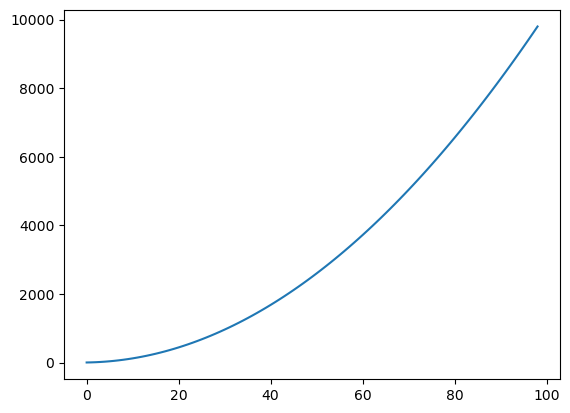

In [71]:
import math
import matplotlib.pyplot as plt

ppn=multiprocessing.cpu_count()
ppn=1

from worker import funcx2

if __name__ == '__main__':
    with multiprocessing.Pool(ppn) as p:
        ret = p.map(funcx2, range(1,100))
        
plt.plot(ret);

In [72]:
multiprocessing.cpu_count()

8

This is a function to get the number of cores on the system. That is different from the number of cores available to the Python process. The recommended method is using `os.sched_getaffinity(0)` but it is absent on some architectures. In particular in macOS, Windows, and some old Linux distros.

# Final Remarks

The Python Standard Library is extensive, and the API is more prone to changes than the language itself. In real projects is better to decide what will be the oldest version of Python that will be supported and keep compatibility until the marker is shifted for a more recent version. Most Linux distributions today include Python 3.9 or newer.

# Acknowledgments and References

This Notebook has been adapted by **Guillermo Avendaño** (WVU), **Jose Rogan** (Universidad de Chile) and **Aldo Humberto Romero** (WVU) from the [Tutorials for Stanford cs228 and cs231n](https://github.com/kuleshov/cs228-material). A large part of the info was also built from scratch. In turn, that material was adapted by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) from the `CS231n` Python tutorial by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/). Another good resource, in particular, if you want to just look for an answer to specific questions is [planetpython.org](http:planetpython.org), in particular for data science.

Changes to the original tutorial include strict Python 3 formats and a split of the material to fit a series of lessons on Python Programming for WVU's faculty and graduate students.

The support of the National Science Foundation and the US Department of Energy under projects: DMREF-NSF 1434897, NSF OAC-1740111 and DOE DE-SC0016176 is recognized.

<div style="clear: both; display: table;">
<div style="border: none; float: left; width: 40%; padding: 10px">
<img src="fig/NSF.jpg" alt="National Science Foundation" style="width:50%" align="left">
    </div>
    <div style="border: none; float: right; width: 40%; padding: 10px">
<img src="fig/DOE.jpg" alt="National Science Foundation" style="width:50%" align="right">
</div>

# Back of the Book

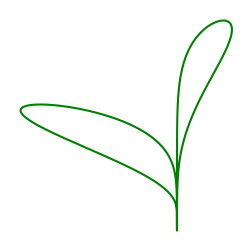

In [73]:
plt.figure(figsize=(3,3))
n = chapter_number
maxt=(2*(n-1)+3)*np.pi/2
t = np.linspace(np.pi/2, maxt, 1000)
tt= 1.0/(t+0.01)
x = (maxt-t)*np.cos(t)**3
y = t*np.sqrt(np.abs(np.cos(t))) + np.sin(0.3*t)*np.cos(2*t)
plt.plot(x, y, c="green")
plt.axis('off');

In [74]:
end = time.time()
print(f'Chapter {chapter_number} run in {int(end - start):d} seconds')

Chapter 2 run in 3 seconds
